# 1. Basic Introduction and Setup


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Scikit-learn version:", sklearn.__version__)
print("Welcome to the Scikit-learn Tutorial!")

Scikit-learn version: 1.7.0
Welcome to the Scikit-learn Tutorial!


# Load a sample dataset to get started


In [2]:
iris = datasets.load_iris()
print("Dataset shape:", iris.data.shape)
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

# Create a DataFrame for easier manipulation
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print("\nFirst 5 rows:")
print(iris_df.head())

Dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


# 2. Data Preprocessing


In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Example with missing data
np.random.seed(42)
data_with_missing = iris_df.copy()
# Introduce some missing values
mask = np.random.random(data_with_missing.shape) < 0.1
data_with_missing = data_with_missing.mask(mask)

print("Missing values per column:")
print(data_with_missing.isnull().sum())

# Imputation strategies
imputer = SimpleImputer(strategy='mean')
numerical_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data_imputed = data_with_missing.copy()
data_imputed[numerical_features] = imputer.fit_transform(data_imputed[numerical_features])

print("\nMissing values after imputation:")
print(data_imputed.isnull().sum())

Missing values per column:
sepal length (cm)    17
sepal width (cm)     10
petal length (cm)    23
petal width (cm)      8
target               21
species              19
dtype: int64

Missing values after imputation:
sepal length (cm)     0
sepal width (cm)      0
petal length (cm)     0
petal width (cm)      0
target               21
species              19
dtype: int64


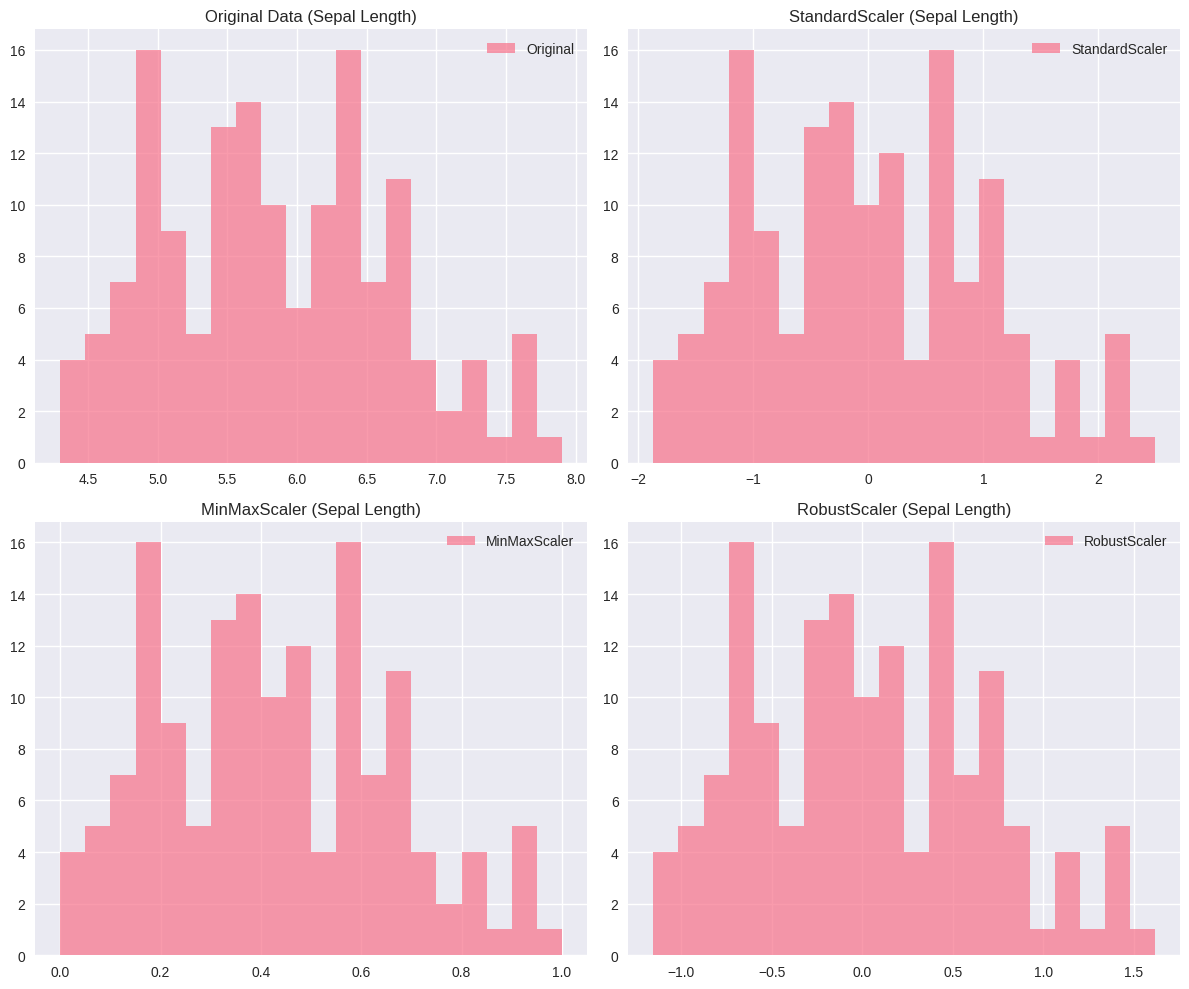

In [4]:
# Scaling demonstrations
X = iris.data
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# Original data
axes[0].hist(X[:, 0], bins=20, alpha=0.7, label='Original')
axes[0].set_title('Original Data (Sepal Length)')
axes[0].legend()

for i, (name, scaler) in enumerate(scalers.items(), 1):
    X_scaled = scaler.fit_transform(X)
    axes[i].hist(X_scaled[:, 0], bins=20, alpha=0.7, label=name)
    axes[i].set_title(f'{name} (Sepal Length)')
    axes[i].legend()

plt.tight_layout()
plt.show()

# 3. Classification Algorithms


Logistic Regression: 1.0000
Random Forest: 1.0000
SVM: 1.0000
K-Nearest Neighbors: 1.0000
Naive Bayes: 0.9778
Decision Tree: 1.0000


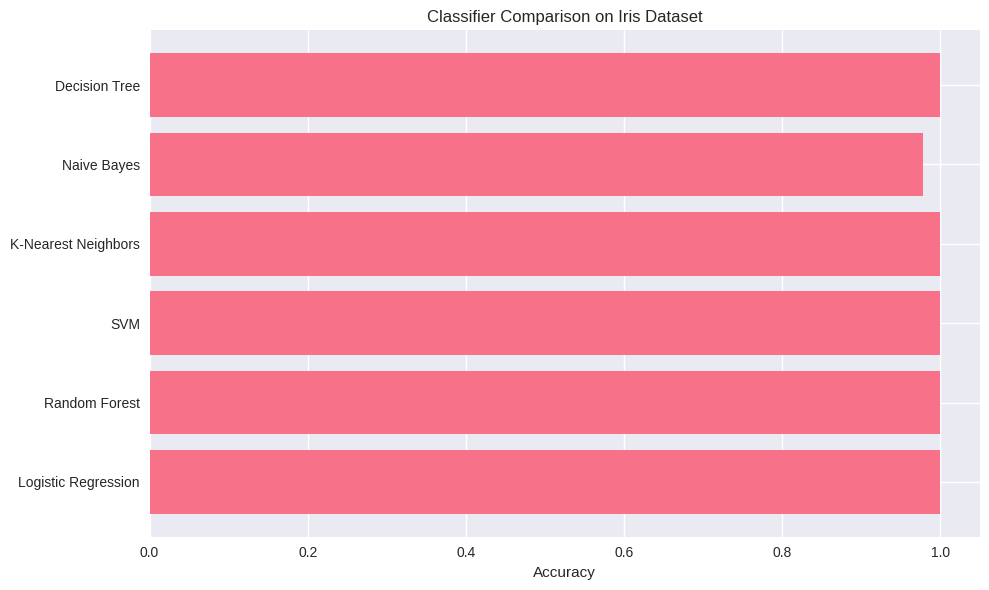

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Prepare data
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    # Use scaled data for algorithms that benefit from it
    if name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: {accuracy:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
names = list(results.keys())
scores = list(results.values())
plt.barh(names, scores)
plt.xlabel('Accuracy')
plt.title('Classifier Comparison on Iris Dataset')
plt.tight_layout()
plt.show()


Best classifier: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



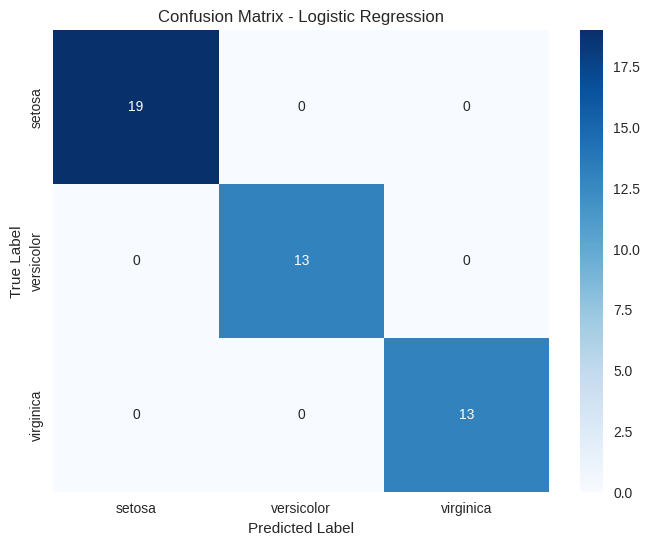

In [11]:
# Detailed analysis of best performer
best_classifier = max(results, key=results.get)
print(f"\nBest classifier: {best_classifier}")

# Train the best classifier and show detailed results
clf = classifiers[best_classifier]
if best_classifier in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
else:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title(f'Confusion Matrix - {best_classifier}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 4. Regression Analysis


Linear Regression: MSE = 0.0107, R² = 1.0000
Ridge Regression: MSE = 0.0867, R² = 1.0000
Lasso Regression: MSE = 10.1410, R² = 0.9997
Random Forest: MSE = 7390.2715, R² = 0.8064
SVR: MSE = 35149.5046, R² = 0.0790


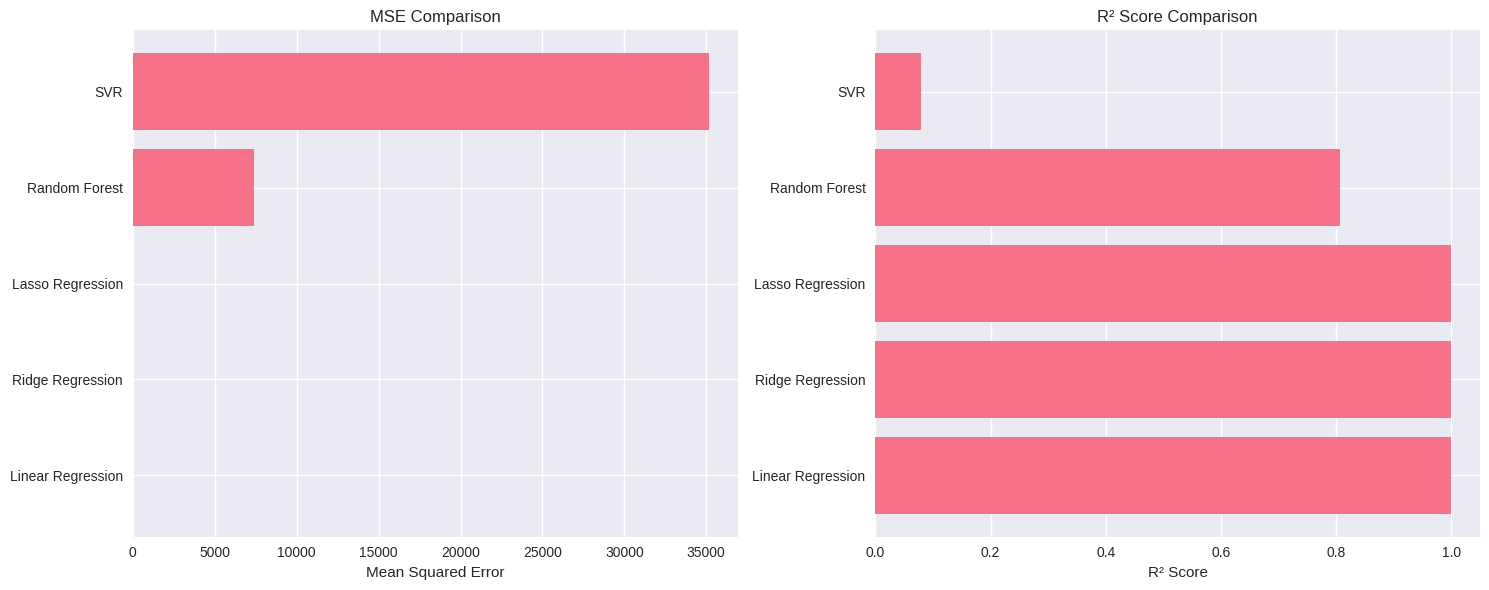

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Generate synthetic regression data
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, n_informative=10, 
                               noise=0.1, random_state=42)

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42)

# Scale the data
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Initialize regressors
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# Train and evaluate regressors
reg_results = {}
for name, reg in regressors.items():
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVR']:
        reg.fit(X_train_reg_scaled, y_train_reg)
        y_pred_reg = reg.predict(X_test_reg_scaled)
    else:
        reg.fit(X_train_reg, y_train_reg)
        y_pred_reg = reg.predict(X_test_reg)
    
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    reg_results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")

# Visualize regression results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# MSE comparison
names = list(reg_results.keys())
mse_scores = [reg_results[name]['MSE'] for name in names]
ax1.barh(names, mse_scores)
ax1.set_xlabel('Mean Squared Error')
ax1.set_title('MSE Comparison')

# R² comparison
r2_scores = [reg_results[name]['R2'] for name in names]
ax2.barh(names, r2_scores)
ax2.set_xlabel('R² Score')
ax2.set_title('R² Score Comparison')

plt.tight_layout()
plt.show()

# 5. Clustering Techniques


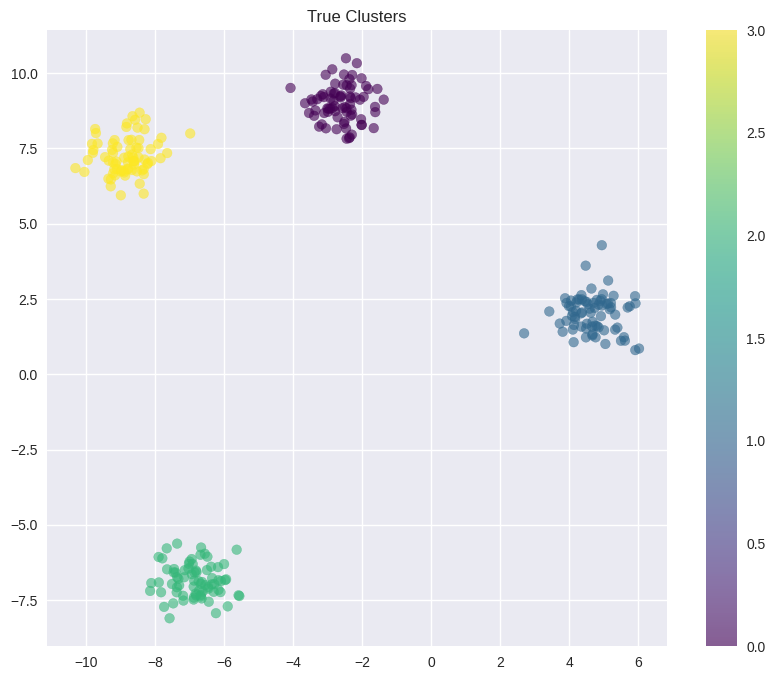

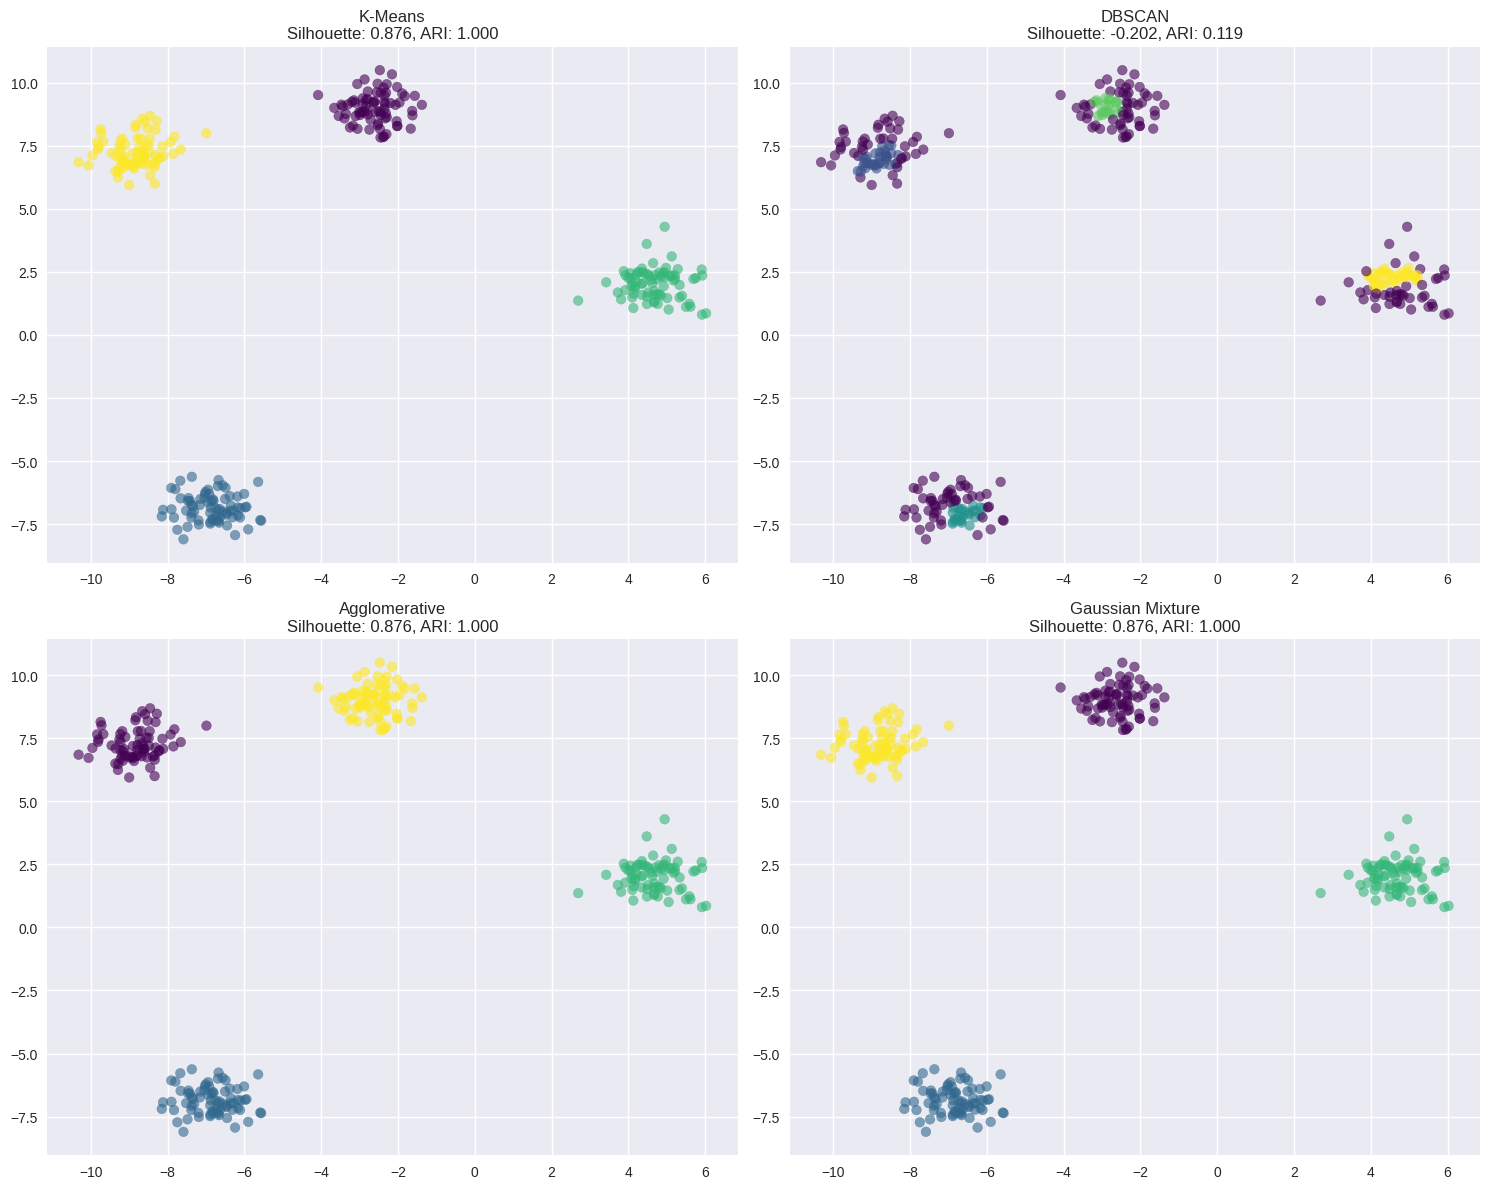

In [13]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.datasets import make_blobs

# Generate synthetic clustering data
X_cluster, y_true = make_blobs(n_samples=300, centers=4, n_features=2, 
                               random_state=42, cluster_std=0.60)

# Visualize original data
plt.figure(figsize=(10, 8))
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=y_true, cmap='viridis', alpha=0.6)
plt.title('True Clusters')
plt.colorbar()
plt.show()

# Apply different clustering algorithms
clustering_algorithms = {
    'K-Means': KMeans(n_clusters=4, random_state=42),
    'DBSCAN': DBSCAN(eps=0.3, min_samples=10),
    'Agglomerative': AgglomerativeClustering(n_clusters=4),
    'Gaussian Mixture': GaussianMixture(n_components=4, random_state=42)
}

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, (name, algorithm) in enumerate(clustering_algorithms.items()):
    if name == 'Gaussian Mixture':
        cluster_labels = algorithm.fit_predict(X_cluster)
    else:
        cluster_labels = algorithm.fit_predict(X_cluster)
    
    # Calculate silhouette score
    if len(set(cluster_labels)) > 1:  # Avoid error when all points are in one cluster
        silhouette = silhouette_score(X_cluster, cluster_labels)
        ari = adjusted_rand_score(y_true, cluster_labels)
    else:
        silhouette = -1
        ari = -1
    
    axes[i].scatter(X_cluster[:, 0], X_cluster[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    axes[i].set_title(f'{name}\nSilhouette: {silhouette:.3f}, ARI: {ari:.3f}')

plt.tight_layout()
plt.show()

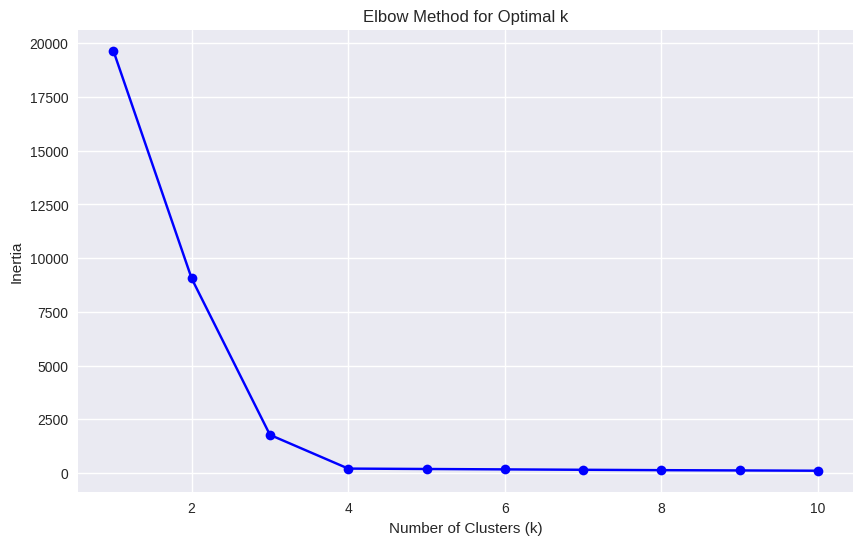

In [14]:
# Elbow method for optimal K in K-Means
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# 6. Dimensionality Reduction


Original shape: (1797, 64)
Number of features: 64


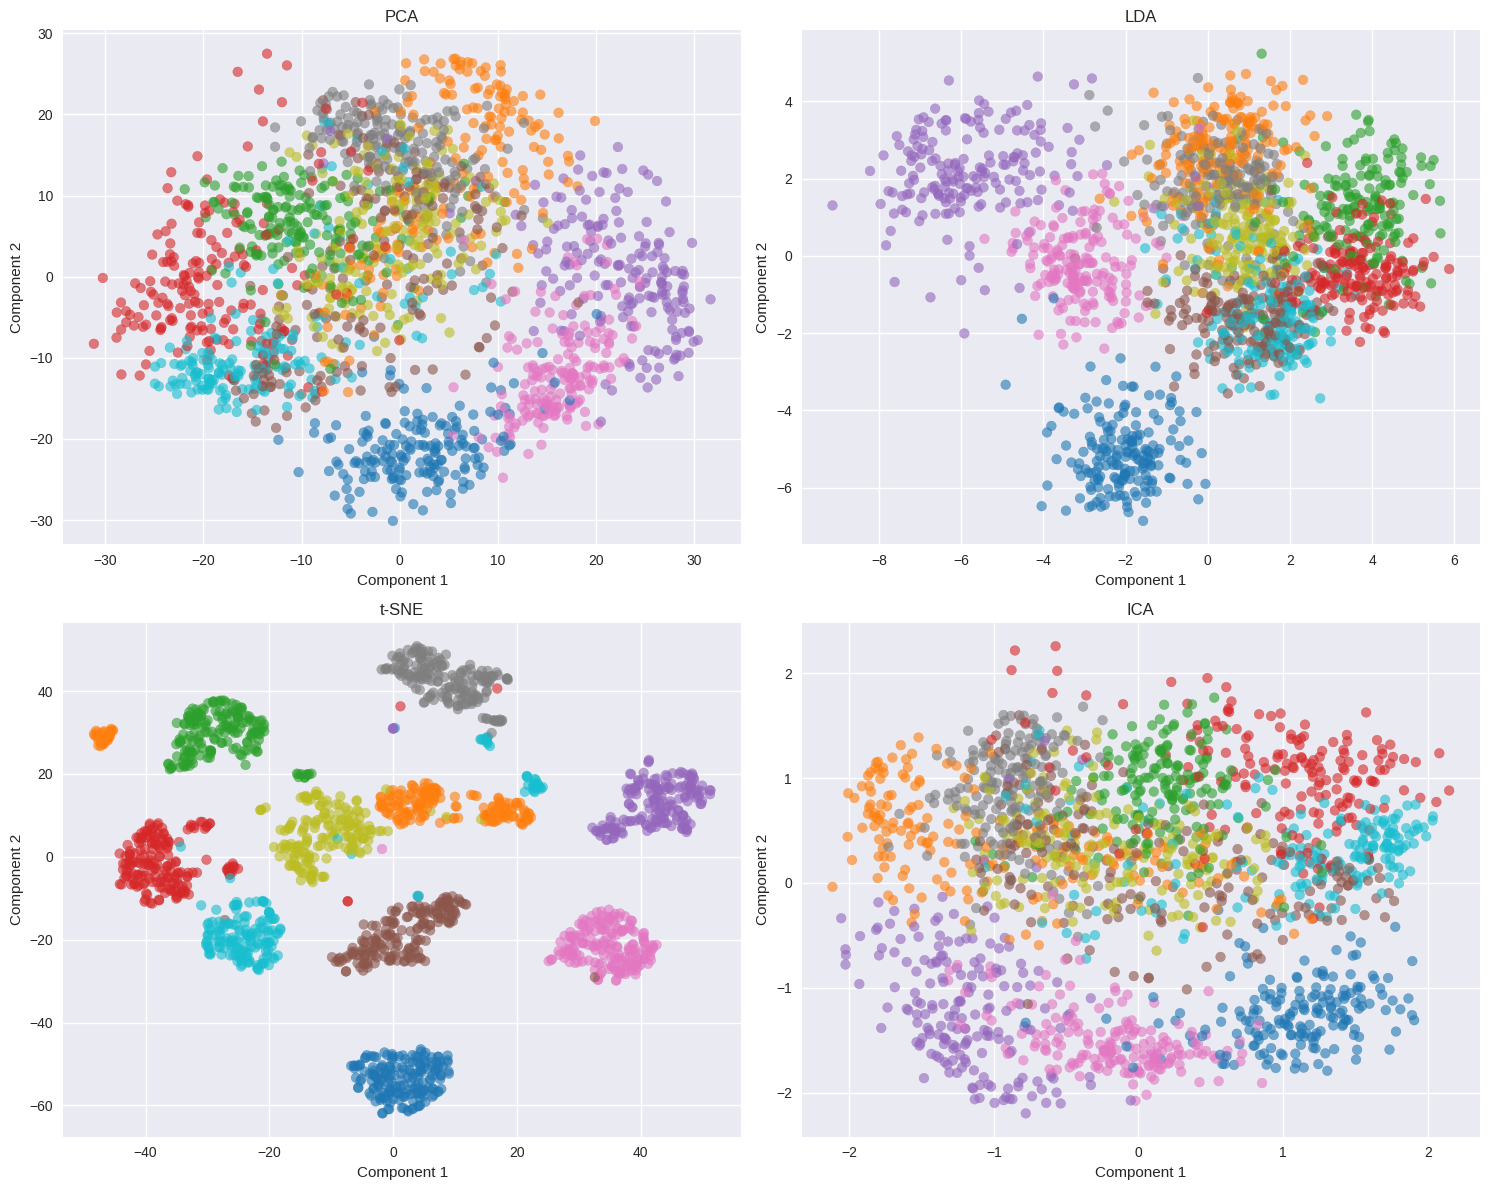

In [15]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_digits

# Load digits dataset for dimensionality reduction demo
digits = load_digits()
print(f"Original shape: {digits.data.shape}")
print(f"Number of features: {digits.data.shape[1]}")

# Apply different dimensionality reduction techniques
reduction_techniques = {
    'PCA': PCA(n_components=2, random_state=42),
    'LDA': LDA(n_components=2),
    't-SNE': TSNE(n_components=2, random_state=42, perplexity=30),
    'ICA': FastICA(n_components=2, random_state=42)
}

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, (name, technique) in enumerate(reduction_techniques.items()):
    if name == 'LDA':
        # LDA requires target labels
        X_reduced = technique.fit_transform(digits.data, digits.target)
    else:
        X_reduced = technique.fit_transform(digits.data)
    
    scatter = axes[i].scatter(X_reduced[:, 0], X_reduced[:, 1], 
                             c=digits.target, cmap='tab10', alpha=0.6)
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Component 1')
    axes[i].set_ylabel('Component 2')

plt.tight_layout()
plt.show()

# 7. Model Selection and Evaluation

In [16]:

from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Create a pipeline for systematic model evaluation
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))
])

# Parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf', 'linear']
}

# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Cross-validation scores
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=10)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Best parameters: {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Best cross-validation score: 0.9523809523809523
Cross-validation scores: [1.         1.         1.         1.         1.         0.93333333
 0.86666667 1.         1.         1.        ]
Mean CV score: 0.9800 (+/- 0.0854)


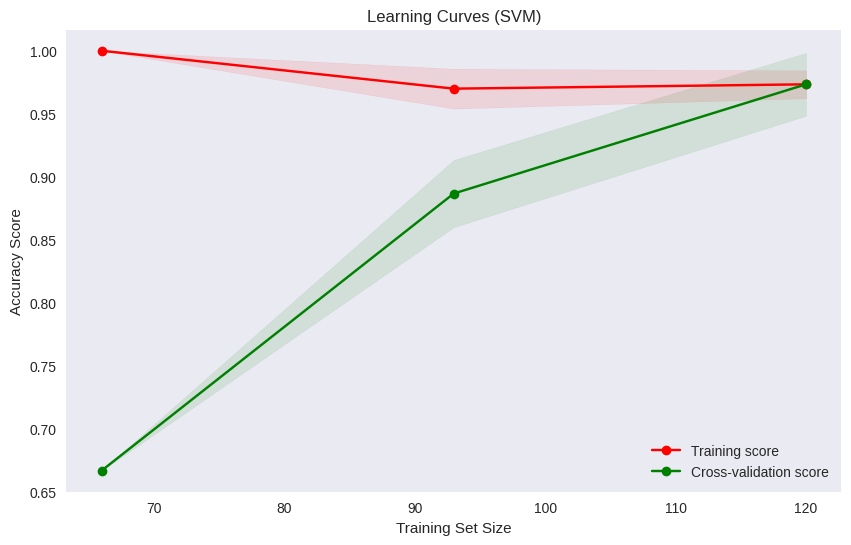

In [17]:
# Learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.show()

# Plot learning curve for the best estimator
plot_learning_curve(grid_search.best_estimator_, "Learning Curves (SVM)", X, y, cv=5)

# 8. Ensemble Methods


Random Forest: 0.9667 (+/- 0.0422)
Gradient Boosting: 0.9600 (+/- 0.0653)
AdaBoost: 0.9533 (+/- 0.0680)
Bagging: 0.9600 (+/- 0.0653)
Voting (Hard): 0.9667 (+/- 0.0422)
Voting (Soft): 0.9667 (+/- 0.0422)


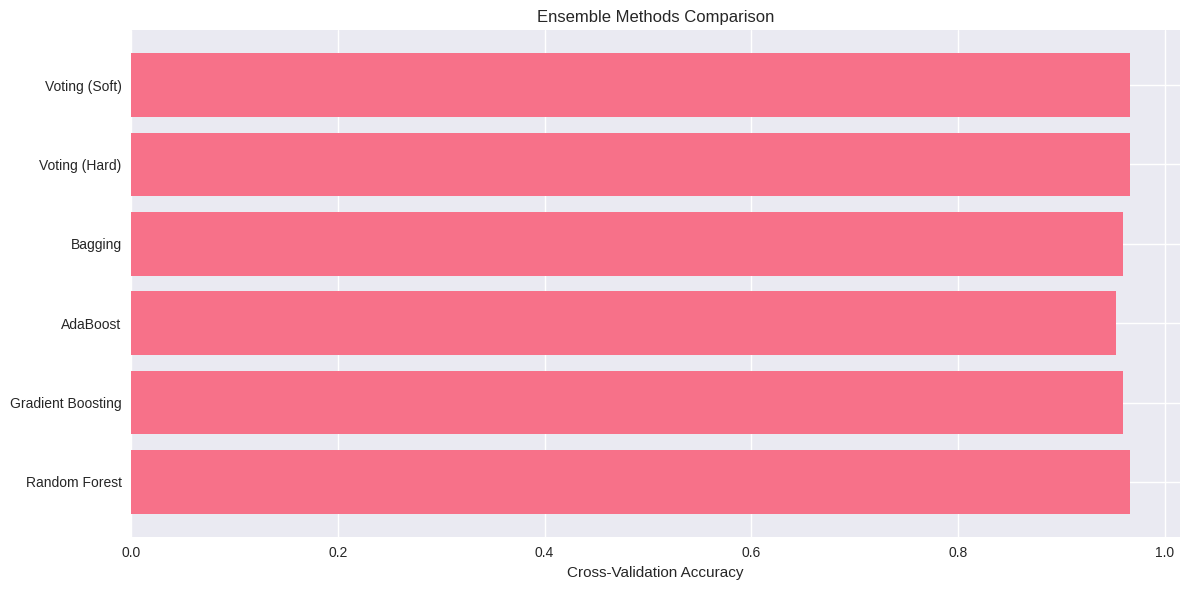

In [18]:
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                             AdaBoostClassifier, VotingClassifier, BaggingClassifier)
from sklearn.tree import DecisionTreeClassifier

# Create base classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Bagging ensemble
bagging = BaggingClassifier(estimator=dt, n_estimators=100, random_state=42)

# Voting ensemble
voting_hard = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('svm', svm)],
    voting='hard'
)

voting_soft = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('svm', svm)],
    voting='soft'
)

# Ensemble methods comparison
ensemble_methods = {
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'AdaBoost': ada,
    'Bagging': bagging,
    'Voting (Hard)': voting_hard,
    'Voting (Soft)': voting_soft
}

ensemble_results = {}
for name, ensemble in ensemble_methods.items():
    # Use cross-validation for robust evaluation
    cv_scores = cross_val_score(ensemble, X, y, cv=5)
    ensemble_results[name] = cv_scores.mean()
    print(f"{name}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Visualize ensemble results
plt.figure(figsize=(12, 6))
names = list(ensemble_results.keys())
scores = list(ensemble_results.values())
plt.barh(names, scores)
plt.xlabel('Cross-Validation Accuracy')
plt.title('Ensemble Methods Comparison')
plt.tight_layout()
plt.show()

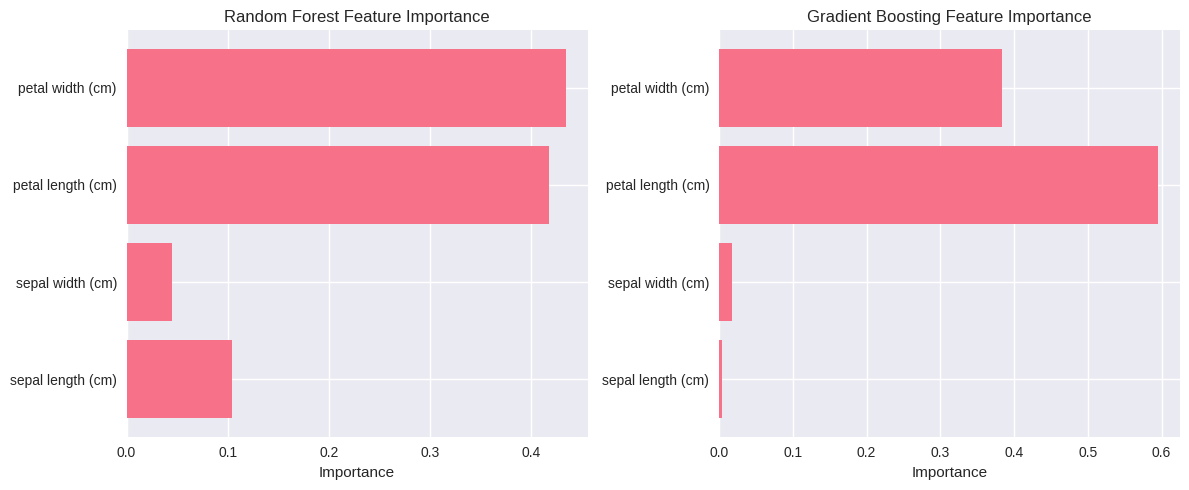

In [19]:
# Feature importance analysis for tree-based methods
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.barh(iris.feature_names, rf.feature_importances_)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')

plt.subplot(1, 2, 2)
plt.barh(iris.feature_names, gb.feature_importances_)
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()

# 9. Computer Vision Applications


Dataset shape: (400, 4096)
Image shape: (400, 64, 64)
Number of classes: 40


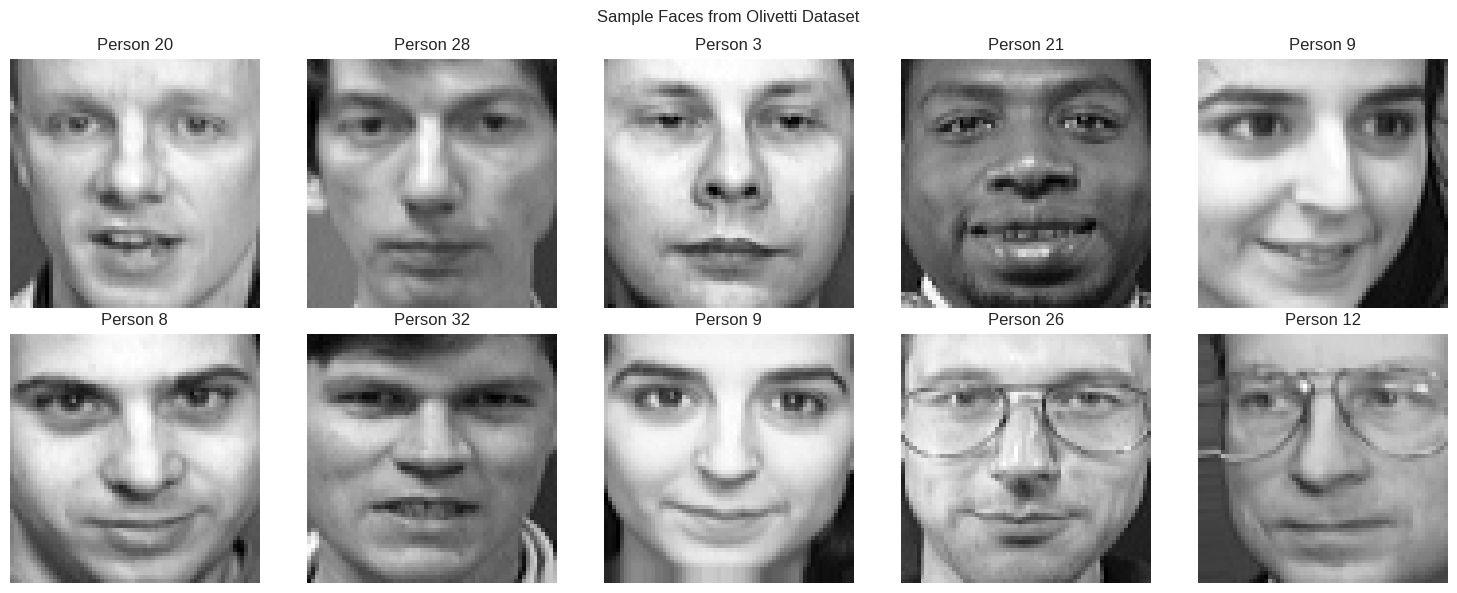

In [20]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load Olivetti faces dataset
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
print(f"Dataset shape: {faces.data.shape}")
print(f"Image shape: {faces.images.shape}")
print(f"Number of classes: {len(np.unique(faces.target))}")

# Visualize some faces
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    axes[i//5, i%5].imshow(faces.images[i], cmap='gray')
    axes[i//5, i%5].set_title(f'Person {faces.target[i]}')
    axes[i//5, i%5].axis('off')
plt.suptitle('Sample Faces from Olivetti Dataset')
plt.tight_layout()
plt.show()

Original feature dimensions: 4096
Reduced feature dimensions: 100
Explained variance ratio: 0.944

Face Recognition Accuracy: 0.9800


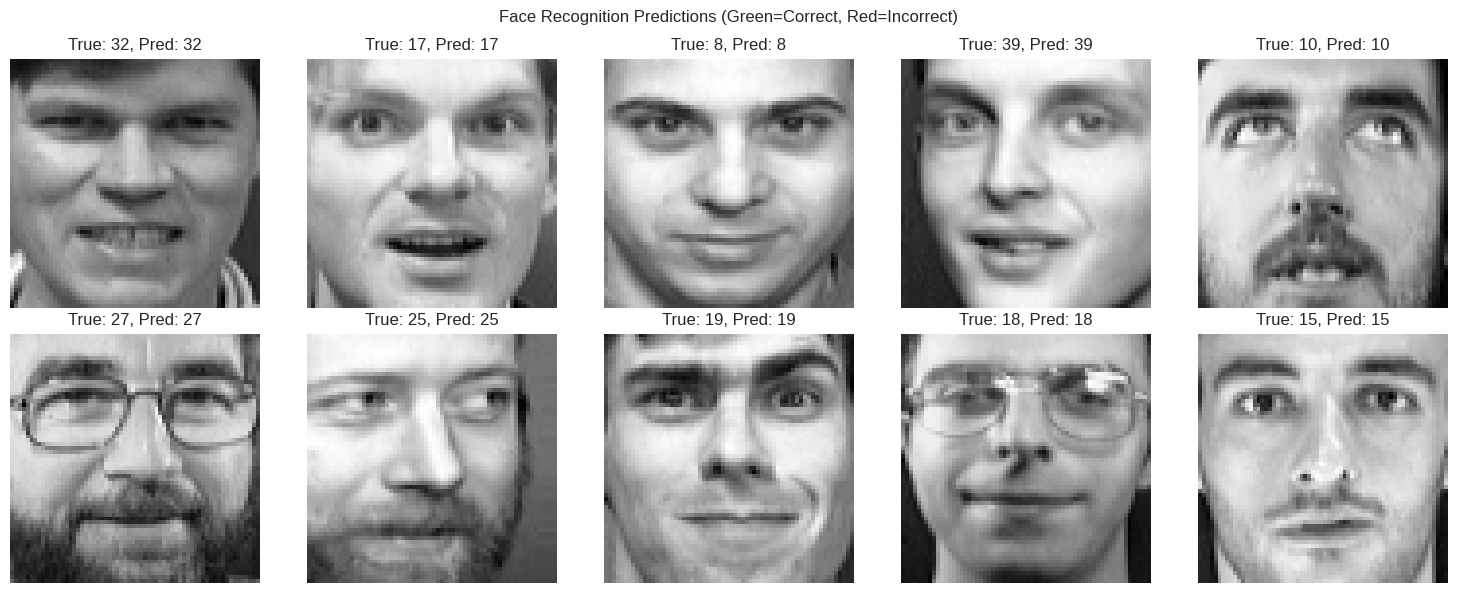

In [21]:
# Face Recognition Pipeline
X_faces, y_faces = faces.data, faces.target
X_train_faces, X_test_faces, y_train_faces, y_test_faces = train_test_split(
    X_faces, y_faces, test_size=0.25, random_state=42, stratify=y_faces)

# Apply PCA for dimensionality reduction
n_components = 100
pca_faces = PCA(n_components=n_components, random_state=42, whiten=True)
X_train_pca = pca_faces.fit_transform(X_train_faces)
X_test_pca = pca_faces.transform(X_test_faces)

print(f"Original feature dimensions: {X_train_faces.shape[1]}")
print(f"Reduced feature dimensions: {X_train_pca.shape[1]}")
print(f"Explained variance ratio: {pca_faces.explained_variance_ratio_.sum():.3f}")

# Train SVM classifier
svm_faces = SVC(kernel='rbf', C=1000, gamma=0.001, random_state=42)
svm_faces.fit(X_train_pca, y_train_faces)

# Predictions
y_pred_faces = svm_faces.predict(X_test_pca)
accuracy_faces = accuracy_score(y_test_faces, y_pred_faces)
print(f"\nFace Recognition Accuracy: {accuracy_faces:.4f}")

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
indices = np.random.choice(len(X_test_faces), 10, replace=False)

for i, idx in enumerate(indices):
    image = X_test_faces[idx].reshape(64, 64)
    axes[i//5, i%5].imshow(image, cmap='gray')
    axes[i//5, i%5].set_title(f'True: {y_test_faces[idx]}, Pred: {y_pred_faces[idx]}')
    axes[i//5, i%5].axis('off')
    
    # Color the border based on correct/incorrect prediction
    if y_test_faces[idx] == y_pred_faces[idx]:
        axes[i//5, i%5].patch.set_edgecolor('green')
    else:
        axes[i//5, i%5].patch.set_edgecolor('red')
    axes[i//5, i%5].patch.set_linewidth(3)

plt.suptitle('Face Recognition Predictions (Green=Correct, Red=Incorrect)')
plt.tight_layout()
plt.show()

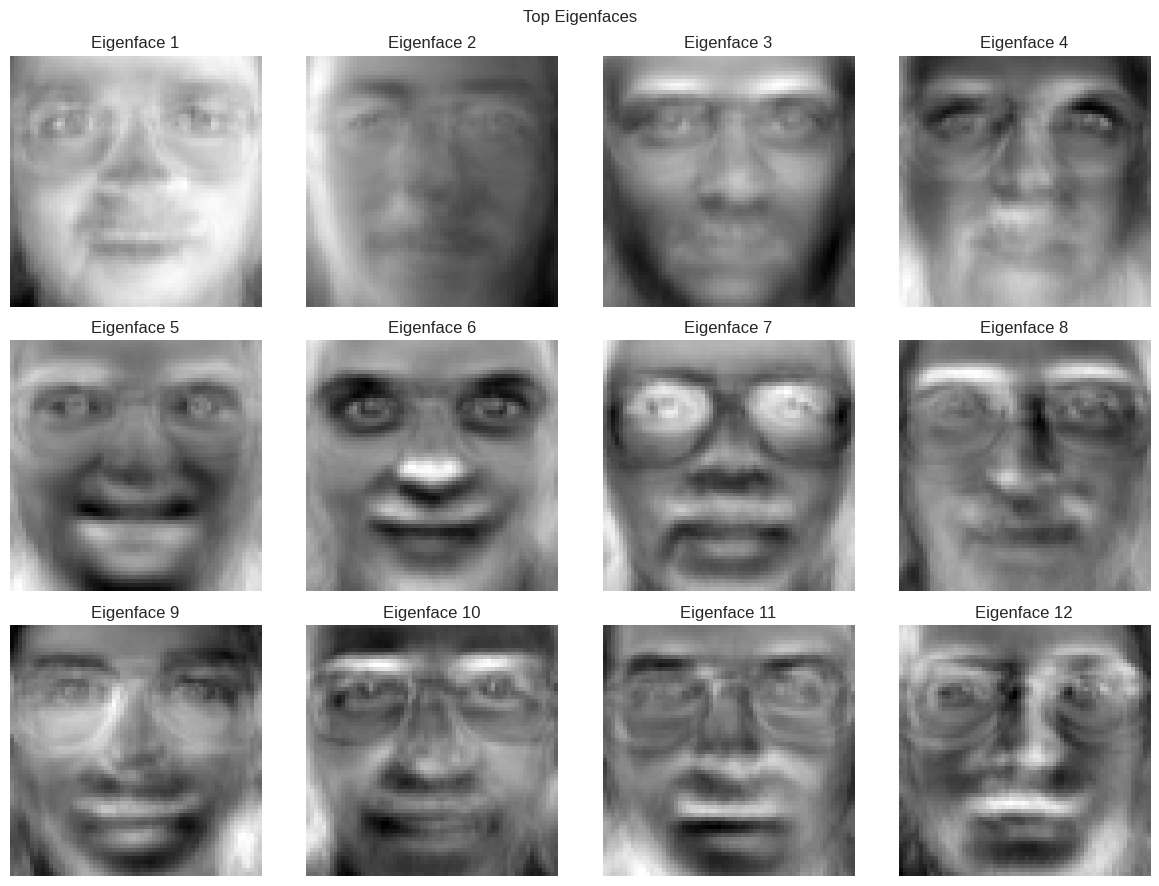

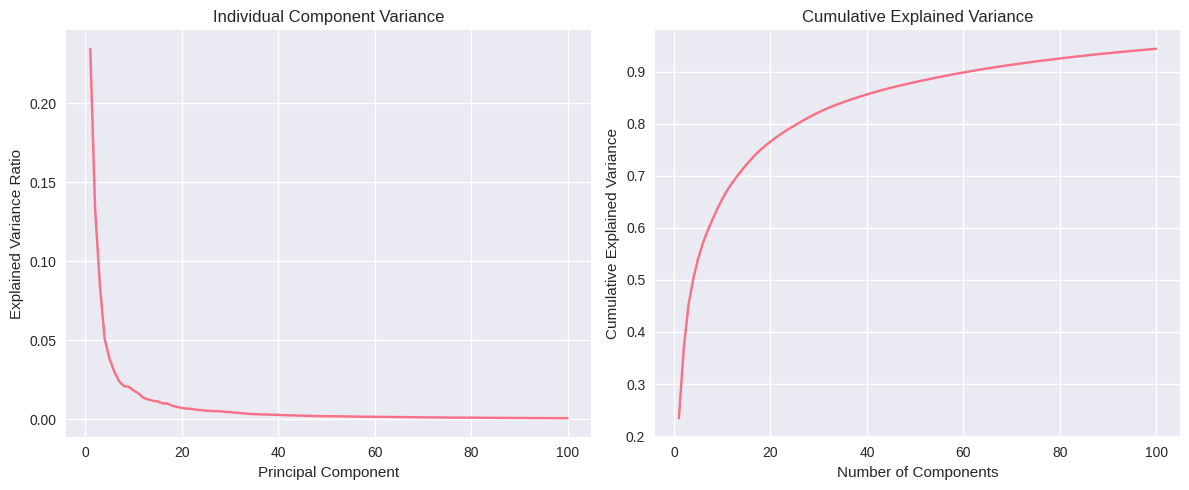

In [22]:
# Eigenfaces visualization
def plot_eigenfaces(pca, h, w, n_eigenfaces=12):
    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    for i, ax in enumerate(axes.flat):
        if i < n_eigenfaces:
            ax.imshow(pca.components_[i].reshape(h, w), cmap='gray')
            ax.set_title(f'Eigenface {i+1}')
        ax.axis('off')
    plt.suptitle('Top Eigenfaces')
    plt.tight_layout()
    plt.show()

plot_eigenfaces(pca_faces, 64, 64)

# Show explained variance by each component
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, n_components + 1), pca_faces.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Component Variance')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, n_components + 1), np.cumsum(pca_faces.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)

plt.tight_layout()
plt.show()

# 10. Sequence Analysis Applications


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import re

# Sample text data for sentiment analysis (simulated)
np.random.seed(42)

# Create sample text data
positive_texts = [
    "I love this product, it's amazing!",
    "Great quality and fast delivery",
    "Excellent service and friendly staff",
    "This is the best purchase I've made",
    "Highly recommend this to everyone",
    "Outstanding product, very satisfied",
    "Perfect quality, exactly what I wanted",
    "Amazing experience, will buy again"
] * 20

negative_texts = [
    "Terrible product, waste of money",
    "Poor quality and bad service",
    "I hate this, completely disappointed",
    "Worst purchase ever made",
    "Do not recommend, very bad",
    "Awful experience, never again",
    "Poor quality control, defective item",
    "Completely unsatisfied with this product"
] * 20

# Combine and create labels
texts = positive_texts + negative_texts
labels = [1] * len(positive_texts) + [0] * len(negative_texts)

# Add some noise to make it more realistic
for i in range(20):
    texts.append("This product is okay, nothing special")
    labels.append(1)  # Neutral-positive
    texts.append("Not great but not terrible either")
    labels.append(0)  # Neutral-negative

print(f"Total samples: {len(texts)}")
print(f"Positive samples: {sum(labels)}")
print(f"Negative samples: {len(labels) - sum(labels)}")

Total samples: 360
Positive samples: 180
Negative samples: 180


TF-IDF + Naive Bayes: 1.0000
TF-IDF + Logistic Regression: 1.0000
Count + Naive Bayes: 1.0000


Text(0.5, 0, 'Accuracy')

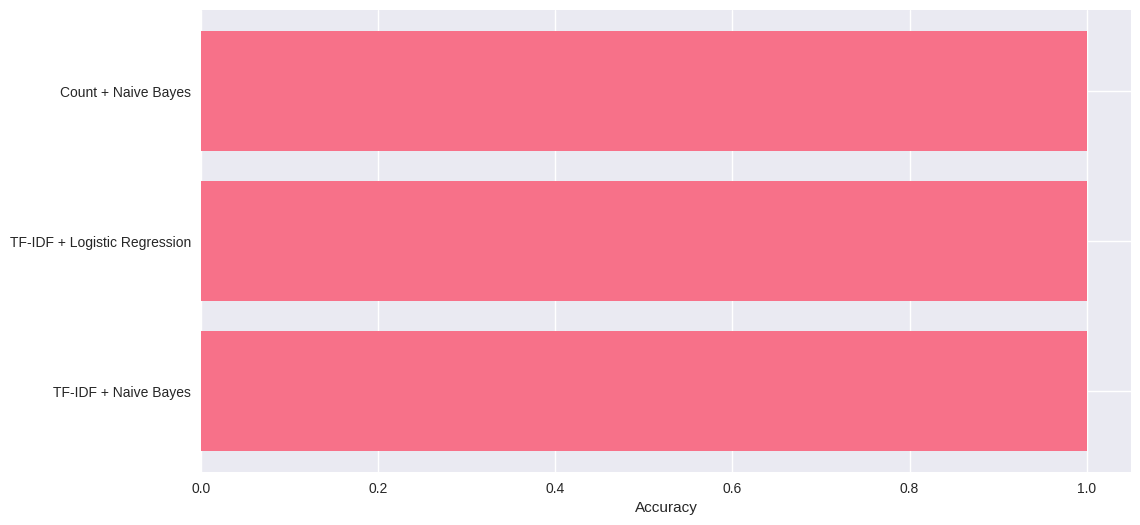

In [25]:
# Text preprocessing and feature extraction
def preprocess_text(text):
    # Convert to lowercase and remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    return text

# Preprocess texts
processed_texts = [preprocess_text(text) for text in texts]

# Split the data
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    processed_texts, labels, test_size=0.3, random_state=42, stratify=labels)

# Create text processing pipelines
pipelines = {
    'TF-IDF + Naive Bayes': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=1000, stop_words='english')),
        ('classifier', MultinomialNB())
    ]),
    'TF-IDF + Logistic Regression': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=1000, stop_words='english')),
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'Count + Naive Bayes': Pipeline([
        ('count', CountVectorizer(max_features=1000, stop_words='english')),
        ('classifier', MultinomialNB())
    ])
}

# Train and evaluate text classifiers
text_results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train_text, y_train_text)
    y_pred_text = pipeline.predict(X_test_text)
    accuracy_text = accuracy_score(y_test_text, y_pred_text)
    text_results[name] = accuracy_text
    print(f"{name}: {accuracy_text:.4f}")

# Visualize text classification results
plt.figure(figsize=(12, 6))
names = list(text_results.keys())
scores = list(text_results.values())
plt.barh(names, scores)
plt.xlabel('Accuracy')